

<center><p float="center">


<h1><center><font size=8>Introduction to Computer Vision: Plant Seedlings Classification Postgraduate Course by Great Learning</center></font></h1>
<h1><center>Presented by: Teresa Fitzgerald</center></h1>

<h1><center>05/24/2024</center></h1>

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [27]:
# ##code to convert the notebook to html and download the html converted file in
# #local machine
from google.colab import files
import os

# Install nbconvert if not already installed
!pip install nbconvert

# Get the list of files in the current directory
file_list = os.listdir()

# Filter the notebook file
notebook_file = [file for file in file_list if file.endswith(".ipynb")]

# Check if the notebook file exists
if notebook_file:
    # Convert the notebook to HTML
    CV_Project_Full_Code_Notebook = notebook_file[0].replace(".ipynb", ".html")
    !jupyter nbconvert --to html {notebook_file[0]}

    # Download the HTML file
    files.download(CV_Project_Full_Code_Notebook.HTML)
else:
    print("No notebook file found in the current directory.")


No notebook file found in the current directory.


###Import libraries

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# from sklearn.utils import class_weight
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

###Loading the dataset

In [3]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the image file of the dataset
images = np.load('/content/drive/My Drive/Colab Notebooks/images-2.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels-2.csv')

## Data Overview

There are 4750 images of size 128x128 pixesl, with 3 channels

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


##Plotting the images to open cv2 and matplot

###Find out if images are RGB
Each pixel value in the images is stored as an unsigned 8-bit integer. This means the values range from 0 to 255, which is typical for image data representing RGB values.

In [ ]:
# Print the shape and data type of the images
print("Shape of the images:", images.shape)
print("Data type of the images:", images.dtype)



# Print the first few rows of the labels to understand their format
print("First few labels:")
print(labels.head())

Shape of the images: (4750, 128, 128, 3)
Data type of the images: uint8
First few labels:
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


###check if all images are RGB

###Observation:Each image has been checked and confirmed to be in RGB format.





In [ ]:
import cv2
import numpy as np

def check_image_format(image):
    # Check if the image is in RGB format
    if len(image.shape) == 3 and image.shape[2] == 3:
        print("The image is in RGB format.")
        # For debugging: Print the first pixel's RGB values
        first_pixel = image[0, 0]
        print(f"First pixel RGB values: R={first_pixel[0]}, G={first_pixel[1]}, B={first_pixel[2]}")
        return True
    elif len(image.shape) == 3 and image.shape[2] == 4:
        print("The image is in RGBA format.")
        return False
    elif len(image.shape) == 2:
        print("The image is in Grayscale format.")
        return False
    else:
        print("The image format is unknown.")
        return False

def check_dataset_format(dataset_images):
    for idx, img in enumerate(dataset_images):
        print(f"Checking image at index {idx}:")
        if not check_image_format(img):
            print(f"Image at index {idx} is not in RGB format.")
            return False
    print("All images in the dataset are in RGB format.")
    return True

def convert_bgr_to_rgb(images):
    for i in range(len(images)):
        images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    return images


dataset_images = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(10)]

# Check if dataset images are in RGB format
if not check_dataset_format(dataset_images):
    print("Converting images from BGR to RGB format...")
    dataset_images = convert_bgr_to_rgb(dataset_images)
    print("Conversion complete.")

# Verify that all images are now in RGB format
check_dataset_format(dataset_images)


Checking image at index 0:
The image is in RGB format.
First pixel RGB values: R=102, G=220, B=225
Checking image at index 1:
The image is in RGB format.
First pixel RGB values: R=83, G=155, B=67
Checking image at index 2:
The image is in RGB format.
First pixel RGB values: R=179, G=15, B=250
Checking image at index 3:
The image is in RGB format.
First pixel RGB values: R=48, G=33, B=196
Checking image at index 4:
The image is in RGB format.
First pixel RGB values: R=155, G=99, B=234
Checking image at index 5:
The image is in RGB format.
First pixel RGB values: R=23, G=213, B=244
Checking image at index 6:
The image is in RGB format.
First pixel RGB values: R=145, G=30, B=244
Checking image at index 7:
The image is in RGB format.
First pixel RGB values: R=24, G=195, B=187
Checking image at index 8:
The image is in RGB format.
First pixel RGB values: R=76, G=113, B=93
Checking image at index 9:
The image is in RGB format.
First pixel RGB values: R=81, G=202, B=40
All images in the datas

True

###open the images to open cv2 and matplot
The images are of different colors so are converting BGR images to RGB images so we could interpret them easily.

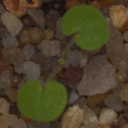

In [ ]:
cv2_imshow(images[5])#plotting images using cv2

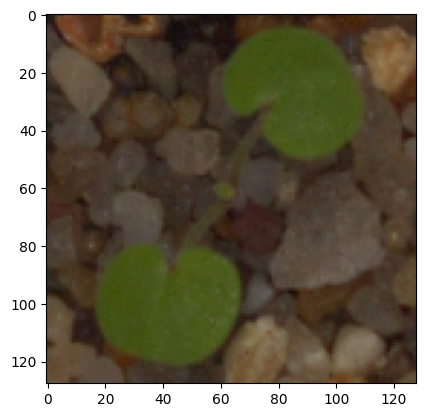

In [ ]:
plt.imshow(images[5])

<!-- ###Verifying images are display correctly when using matplot -->

<!-- ###will convert these BGR images to RGB images so we could interpret them easily -->

### Understand the shape of the dataset
4750, 128, 128, 3): The dataset has 4750 images with a dimension of 128x 128, with a 3 color channel, probably RGB.
(4750, 1) is the  shape of your labels, where
4750 is the number of labels, corresponding to the number of images.
1 indicates that each label is a single value, representing the class of the corresponding image.

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
*Answer:
There are 12 different plant seedlings from images at various stages of growth, some of them are at an early seeding stage. Most of the categories are annual herbs and others are annual grass. Their class differ in the leaves, habitat, flowers and steam.
Random images  of the classes are plot, refered to the below link below.
[Random images for the 12 seedling classes](#cell-id)


1
2. Is the dataset provided an imbalance? (Check with using bar plots).
* Answer:
The class is unbalanced. You can see the distribution of classes in the link below.

[Bar Plot Distribution of the inbalance class ](#cell-id)



###Check for missing data
There is not missing data

In [ ]:
# Check for missing values in the labels dataframe
print(labels.isnull().sum())

Label    0
dtype: int64


###Visualize the labels

###Observation:
Loose Silky-bent and Common Chickweed are the most frequently occurring plant categories in the dataset.The less occurring are Maize and commom wheat.

In [ ]:
print(labels)

                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


count                 4750
unique                  12
top       Loose Silky-bent
freq                   654
Name: Label, dtype: object


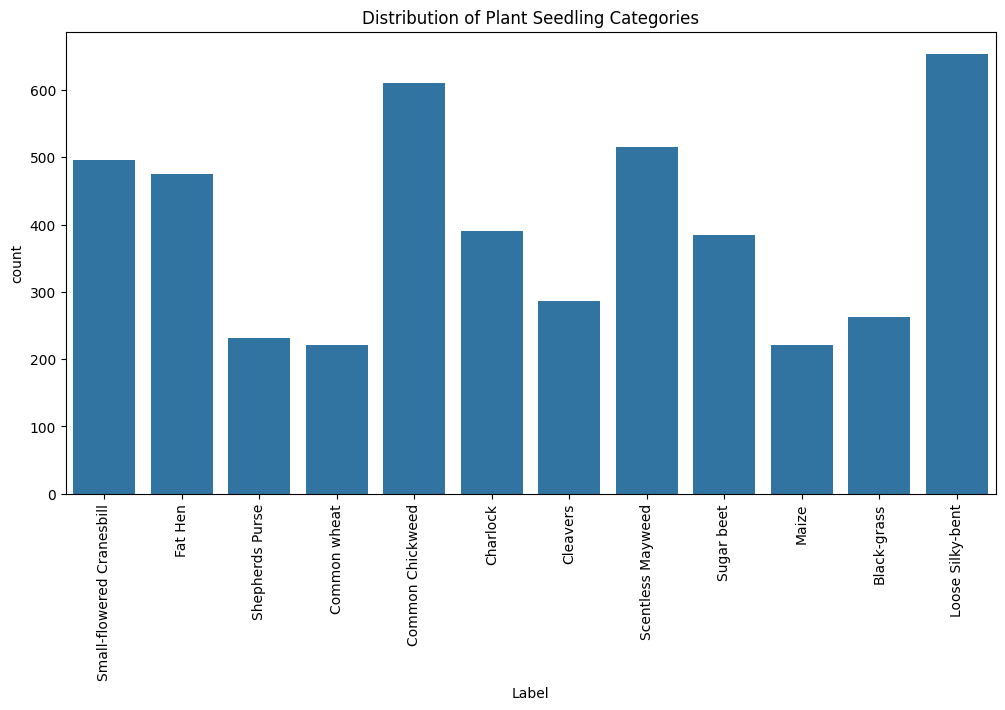

In [ ]:
# Basic statistics of the labels
print(labels['Label'].describe())

# Distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=labels)
plt.title('Distribution of Plant Seedling Categories')
plt.xticks(rotation=90)
plt.show()


In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

###Displaying a random image per each class
###Checking for inbalance data<a name="cell-id"></a>
<!-- # Heading
This is the cell I'm linking to -->

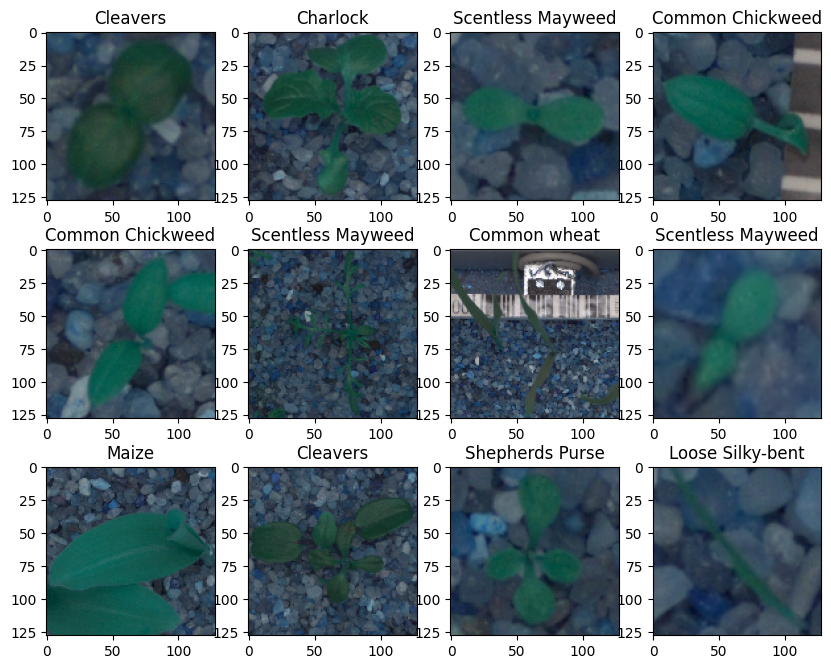

In [ ]:
plot_images(images,labels)

###Images observation
The stones are different in size, it is because posibly the pictures were taken at different distance.

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


###Checking for inbalance data<a name="cell-id"></a>
<!-- # Heading
This is the cell I'm linking to -->

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

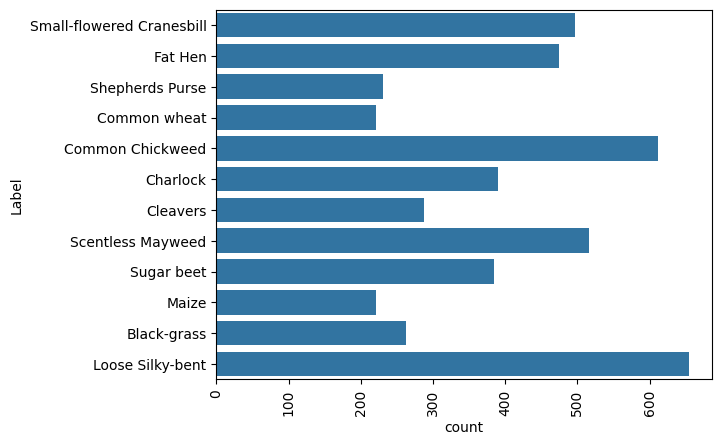

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

Class distribution:
    label  count                    species
0       7    112                      Maize
1       3    103           Common Chickweed
2      11    100                 Sugar beet
3       6     98           Loose Silky-bent
4       5     96                    Fat Hen
5       4     96               Common Wheat
6       9     90            Shepherds Purse
7       8     86          Scentless Mayweed
8       2     58                   Cleavers
9       1     54                   Charlock
10      0     54                Black-grass
11     10     53  Small-flowered Cranesbill

Class percentages:
0     11.2
1     10.3
2     10.0
3      9.8
4      9.6
5      9.6
6      9.0
7      8.6
8      5.8
9      5.4
10     5.4
11     5.3
Name: count, dtype: float64


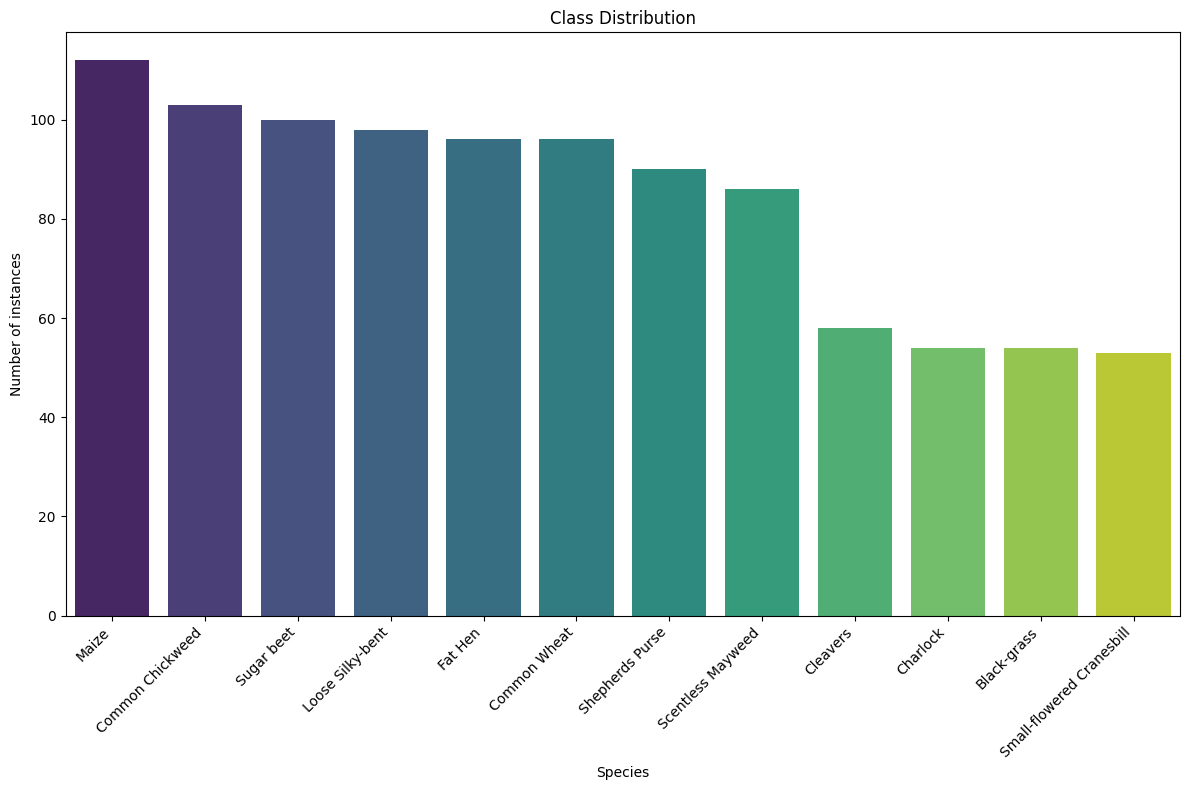

True


The dataset is imbalanced.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_class_imbalance(labels, species_names):
    # Convert labels to a pandas Series for convenience
    labels_series = pd.Series(labels)

    # Count the number of instances for each class
    class_counts = labels_series.value_counts()

    # Convert class counts to a DataFrame to align with species names
    class_counts_df = class_counts.reset_index()
    class_counts_df.columns = ['label', 'count']

    # Map the numeric labels to species names
    class_counts_df['species'] = class_counts_df['label'].map(lambda x: species_names[x])

    # Calculate the percentage of each class
    class_percentages = (class_counts_df['count'] / len(labels_series)) * 100

    print("Class distribution:")
    print(class_counts_df)
    print("\nClass percentages:")
    print(class_percentages)

    # Plot the class distribution
    plt.figure(figsize=(12, 8))
    sns.barplot(x='species', y='count', data=class_counts_df, palette='viridis')
    plt.xlabel('Species')
    plt.ylabel('Number of instances')
    plt.title('Class Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Determine if the dataset is imbalanced
    threshold = 5.0  # Define a threshold for imbalance, e.g., 5%
    min_percentage = class_percentages.min()
    max_percentage = class_percentages.max()

    if max_percentage - min_percentage > threshold:
        print("\nThe dataset is imbalanced.")
        return True
    else:
        print("\nThe dataset is balanced.")
        return False

# List of species
species_names = [
    "Black-grass", "Charlock", "Cleavers", "Common Chickweed",
    "Common Wheat", "Fat Hen", "Loose Silky-bent", "Maize",
    "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"
]

# Example usage:
# Replace this with your actual labels
# Assume labels are integers from 0 to 11 corresponding to the 12 species
labels = np.random.choice(range(12), size=1000, p=[0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1])

# Check if the dataset is imbalanced
check_class_imbalance(labels, species_names)


###Check for consistency in size
Images have same size

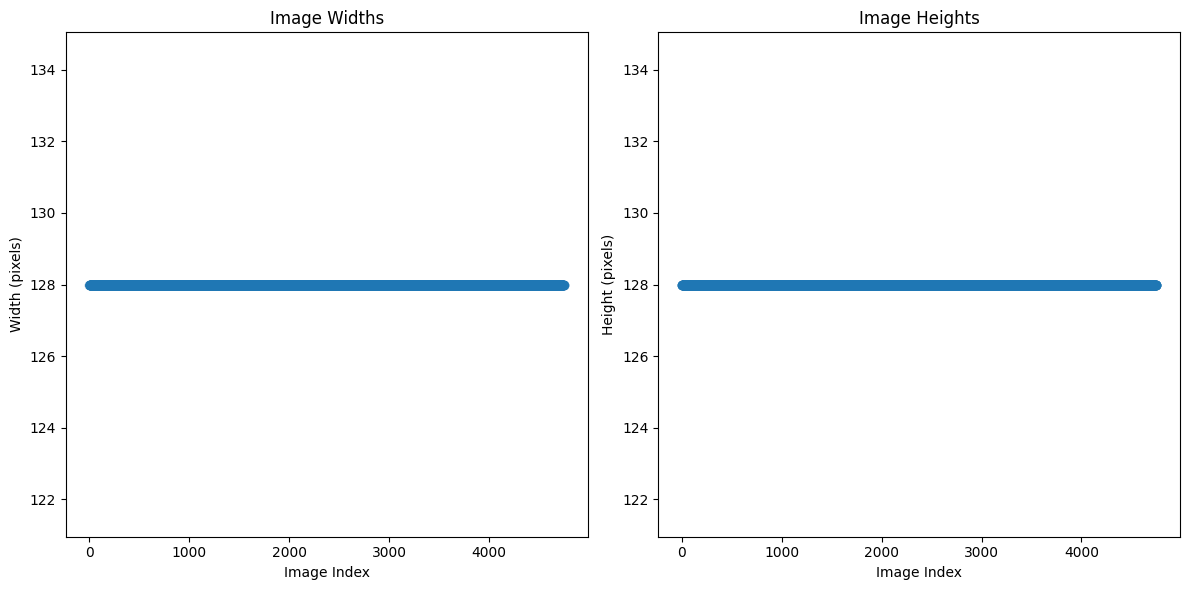

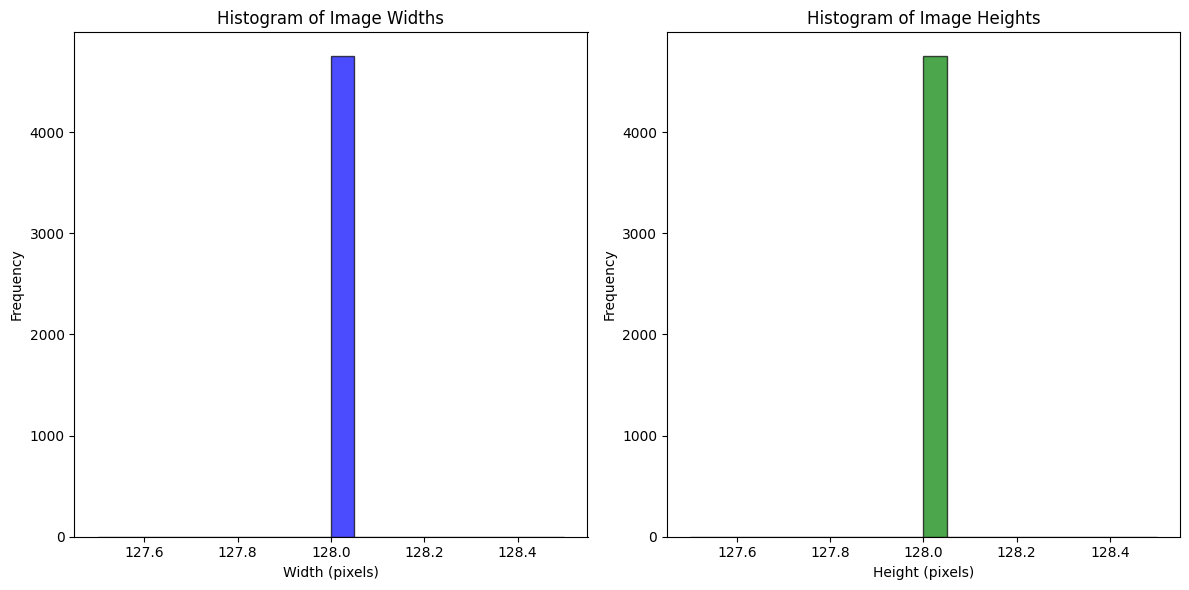

In [ ]:
                      # Initialize lists to store the widths and heights
widths = []
heights = []

# Loop through each image in the dataset
for img in images:
    height, width = img.shape[:2]
    widths.append(width)
    heights.append(height)

# Plot the image widths and heights
plt.figure(figsize=(12, 6))

# Scatter plot for widths and heights
plt.subplot(1, 2, 1)
plt.scatter(range(len(widths)), widths, alpha=0.5)
plt.title('Image Widths')
plt.xlabel('Image Index')
plt.ylabel('Width (pixels)')

plt.subplot(1, 2, 2)
plt.scatter(range(len(heights)), heights, alpha=0.5)
plt.title('Image Heights')
plt.xlabel('Image Index')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# Histogram plot for widths and heights
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Histogram of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###Check if images are the same size



.

In [ ]:
# Function to check if all images are of the same size
def verify_image_sizes(images):
    # Get the dimensions of the first image
    first_image_shape = images[0].shape
    print(f"Expected shape for all images: {first_image_shape}")

    # Initialize a flag and a list to store indices of images with different sizes
    all_same_size = True
    differing_images = []

    # Loop through each image and check its dimensions
    for idx, img in enumerate(images):
        if img.shape != first_image_shape:
            all_same_size = False
            differing_images.append((idx, img.shape))

    if all_same_size:
        print("All images are of the same size.")
    else:
        print(f"Found {len(differing_images)} images with differing sizes.")
        for idx, shape in differing_images:
            print(f"Image at index {idx} has shape {shape}")

    return all_same_size, differing_images

# Verify if all images are of the same size
all_same_size, differing_images = verify_image_sizes(images)


Expected shape for all images: (128, 128, 3)
All images are of the same size.


###Check Pixel Distribution

###Observation
Min Pixel Value: 0

The minimum pixel value is 0, which indicates that there are completely black pixels in the images. This is common in many types of images and generally indicates areas with no intensity or color information.
Max Pixel Value: 255

The maximum pixel value is 255, which is expected for images with 8-bit color depth. This indicates that there are fully white pixels in the images, representing the highest intensity.
Mean Pixel Value: 70.04

The mean pixel value is 70.04. This relatively low mean suggests that the overall brightness of the images is on the darker side. The dataset might contain many dark or underexposed images, or it could be that the images predominantly contain darker objects or backgrounds


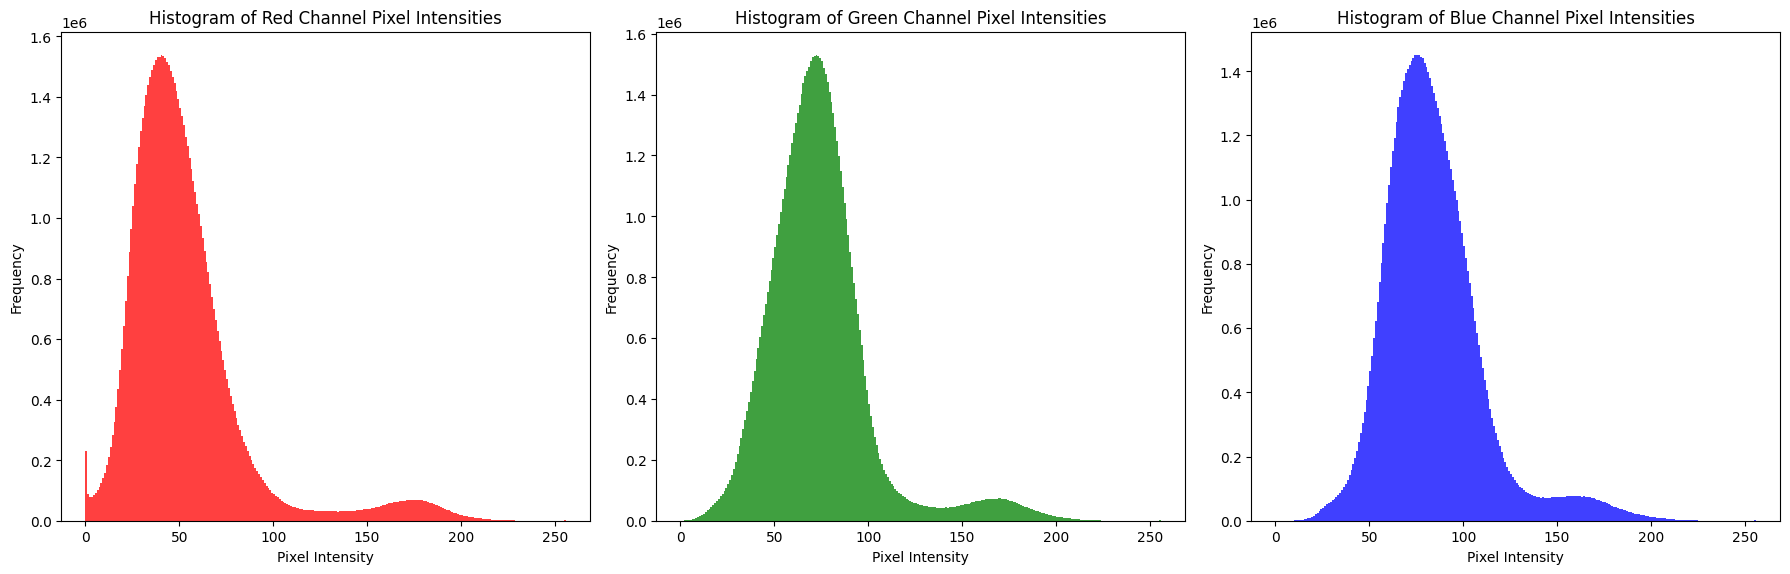

In [ ]:


# Initialize arrays to store pixel values for each channel
red_channel = []
green_channel = []
blue_channel = []

# Loop through each image and extract pixel values for each channel
for img in images:
    red_channel.extend(img[:, :, 0].flatten())
    green_channel.extend(img[:, :, 1].flatten())
    blue_channel.extend(img[:, :, 2].flatten())

# Convert lists to numpy arrays
red_channel = np.array(red_channel)
green_channel = np.array(green_channel)
blue_channel = np.array(blue_channel)

# Plot the histograms for each color channel
plt.figure(figsize=(18, 6))

# Histogram for Red channel
plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=256, range=(0, 256), color='red', alpha=0.75)
plt.title('Histogram of Red Channel Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for Green channel
plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=256, range=(0, 256), color='green', alpha=0.75)
plt.title('Histogram of Green Channel Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for Blue channel
plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=256, range=(0, 256), color='blue', alpha=0.75)
plt.title('Histogram of Blue Channel Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


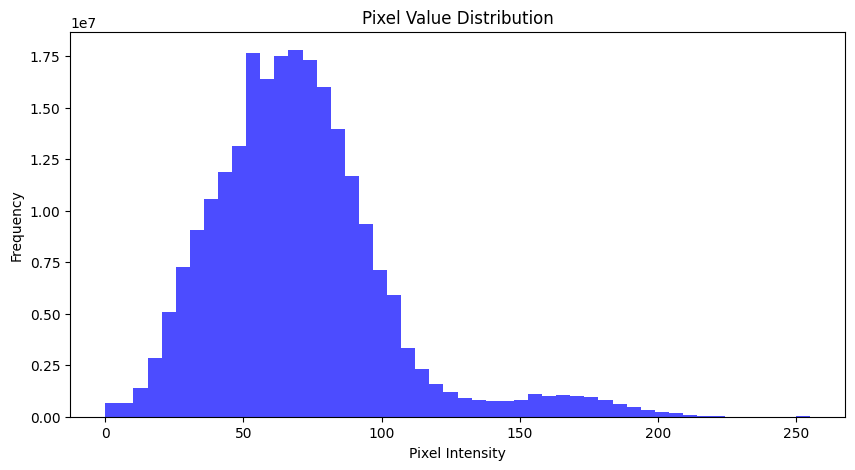

Min pixel value: 0
Max pixel value: 255
Mean pixel value: 70.04
Standard deviation of pixel values: 32.00


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# Function to plot the pixel value distribution
def plot_pixel_distribution(images):
    # Flatten the image array to 1D
    pixel_values = images.flatten()

    # Plot histogram of pixel values
    plt.figure(figsize=(10, 5))
    plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    # Print some statistics
    print(f"Min pixel value: {np.min(pixel_values)}")
    print(f"Max pixel value: {np.max(pixel_values)}")
    print(f"Mean pixel value: {np.mean(pixel_values):.2f}")
    print(f"Standard deviation of pixel values: {np.std(pixel_values):.2f}")

# Check pixel distribution for a subset or the entire dataset
plot_pixel_distribution(images)


###Check memory and size
Even though the memory and size is manageable we are going to reduce the size for simplicity and better computational performance

In [ ]:


# Check the shape of images
num_images, height, width, channels = images.shape
print(f"Number of images: {num_images}")
print(f"Image dimensions: {height}x{width}")
print(f"Number of channels: {channels}")

# Calculate the total memory usage of the image data
image_data_size = images.nbytes
print(f"Total memory usage of image data: {image_data_size / (1024**2):.2f} MB")

# Check the size of the labels dataset
print(f"Number of labels: {len(labels)}")
print(f"Label columns: {labels.columns.tolist()}")

# Calculate the total memory usage of the labels
label_data_size = labels.memory_usage(deep=True).sum()
print(f"Total memory usage of labels data: {label_data_size / (1024**2):.2f} MB")

# Display the first few rows of the labels dataframe
print(labels.head())


Number of images: 4750
Image dimensions: 128x128
Number of channels: 3
Total memory usage of image data: 222.66 MB
Number of labels: 4750
Label columns: ['Label']
Total memory usage of labels data: 0.32 MB
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


<!-- ###Resizing the images -->

###Visualizing images using Gaussian Blurr
Gaussian Blur does not appear to have any significance in the picture

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

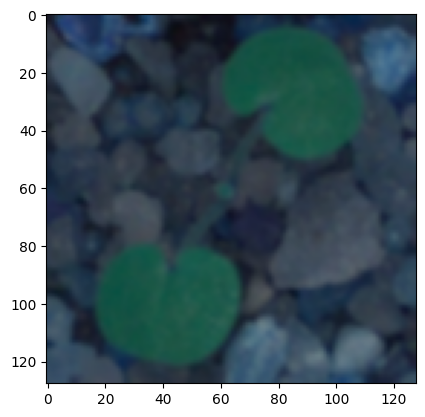

In [ ]:
plt.imshow(images_gb[5])

## Data Pre-Processing

###Convert the BGR images to RGB images

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
#This conversion ensures that the images are displayed with the correct colors in matplotlib
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

###Verifying images are display correctly when using matplot

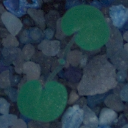

In [ ]:
cv2_imshow(images[5])#plotting images using cv2

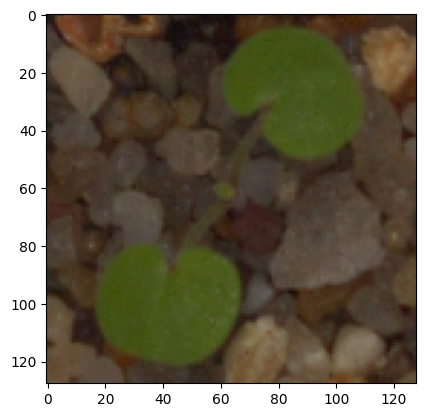

In [ ]:
plt.imshow(images[5])

<!-- ###Resize the images -->

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [5]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

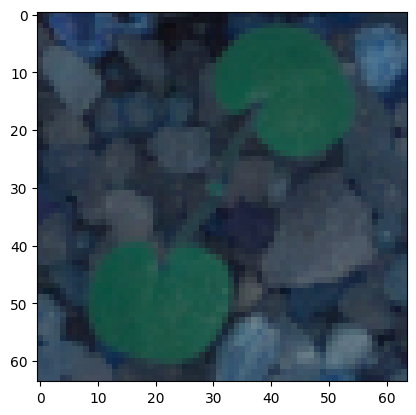

In [6]:
plt.imshow(images_decreased[5])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [7]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [8]:
# Check the shapes of the splits
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (3847, 64, 64, 3), y_train shape: (3847, 1)
X_val shape: (428, 64, 64, 3), y_val shape: (428, 1)
X_test shape: (475, 64, 64, 3), y_test shape: (475, 1)


### Encode the target labels

In [9]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

In [10]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [11]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [12]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

###Build the model

We starts with 64 layers and decreses it to 32 in the next layer.We are using the default valid padding that reduces the dimension of the output.Using 'same' padding, which maintains the spatial dimensions by padding the input. We are going to use weight to balance the unbalance class data.

###Model1 Observation:
It seems that the model is overfitting.

###Initial model with weights to deal with the inbalance class

In [40]:
# !pip install imbalanced-learn
import imblearn
from sklearn.utils import class_weight
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

print(imblearn.__version__)

from imblearn.metrics import classification_report_imbalanced

# Convert pandas Series/DataFrames to numpy arrays if needed
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_val = y_val.values.ravel() if hasattr(y_val, 'values') else y_val.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Verify unique labels in each dataset
print(f"Unique labels in y_train: {np.unique(y_train)}")
print(f"Unique labels in y_val: {np.unique(y_val)}")
print(f"Unique labels in y_test: {np.unique(y_test)}")

# Concatenate all labels to ensure all possible labels are included
all_labels = np.concatenate([y_train, y_val, y_test])

# Check if all 12 classes are present
assert len(np.unique(all_labels)) == 12, "Not all 12 classes are present in the data"

# Fit LabelBinarizer on all labels
enc = LabelBinarizer()
enc.fit(all_labels)

# Transform individual sets
y_train_encoded = enc.transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

# Calculate class weights using the classes from LabelBinarizer and y_train
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Determine the number of classes
num_classes = len(enc.classes_)

# Define the CNN model (Model 1)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model with Adam optimizer
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=15,
                    batch_size=32,
                    class_weight=class_weights_dict)


0.10.1
Unique labels in y_train: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Unique labels in y_val: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Unique labels in y_test: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Epoch 1/15
121/121 [==============================] - 36s 284ms/step - loss: 2.4565 - accuracy: 0.0998 - val_loss: 2.3842 - val_accuracy: 0.1799
Epoch 2/15
121/121 [==============================] - 35s 288ms/step - loss: 2.3082 - accuracy: 0.1747 - val_loss: 2.1197 - val_accuracy: 0.2453
Epoch 3/15
121/121 [==============================] - 53s 

In [ ]:
!pip install --upgrade imbalanced-learn

In [ ]:
# !pip install imblearn  # Install the imblearn package

# # Import the necessary module
# from imblearn.utils import class_weight

# # The rest of the code remains unchanged

###Model1 Evaluation
The model seems to overfit on the data.

###Evaluating the model in test data

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')

15/15 [==============================] - 3s 191ms/step - loss: 1.6553 - accuracy: 0.4000
Test accuracy: 0.4000000059604645


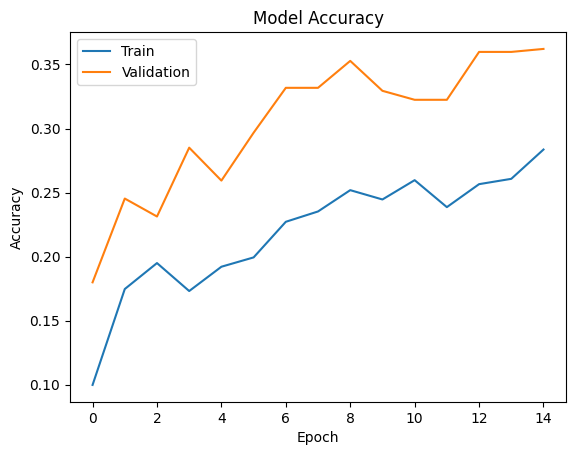

In [ ]:
# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
# print(f'Test accuracy: {test_accuracy}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Generating the predictions using test data

In [41]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 63ms/step


In [42]:
y_pred

array([[2.20206360e-08, 3.75310406e-02, 1.01317317e-04, ...,
        9.86936912e-02, 5.82489243e-04, 8.75328947e-03],
       [1.14355041e-02, 7.73896649e-02, 1.12387925e-01, ...,
        1.68550134e-01, 4.75575060e-01, 4.14340347e-02],
       [9.42492671e-03, 9.41113457e-02, 1.07239529e-01, ...,
        1.95154846e-01, 4.08933580e-01, 4.99378294e-02],
       ...,
       [3.60792786e-01, 1.28230784e-06, 8.00744980e-04, ...,
        2.53975285e-09, 2.72238960e-08, 9.96203526e-05],
       [2.11549341e-03, 1.42651439e-01, 3.59680690e-02, ...,
        1.58875600e-01, 3.74409072e-02, 8.15165713e-02],
       [1.80539694e-02, 1.38716608e-01, 1.23001724e-01, ...,
        1.80961847e-01, 1.80175215e-01, 8.63772854e-02]], dtype=float32)

###Plotting the Confusion Matrix

###Observations

Overall Accuracy:
The model achieved an overall accuracy of 40%, which indicates that 40% of the total predictions were correct.

 Class-wise Performance.
Best performing class with high precision and recall.
Sugar beet: Precision of 0.64, recall of 0.42, F1-score of 0.51. Good precision but lower recall.
Best Performing Class:

Small-flowered Cranesbill: This class has the highest precision (0.71), recall (0.80), and F1-score (0.75). It is the most correctly identified class by the model.

Least Performing Class:

Common Chickweed: Despite having high precision (0.75), it has an extremely low recall (0.05) and F1-score (0.09). The model misses most instances of this class, making it the least correctly identified class.
Charlock also performed poorly with low precision (0.31) and very low recall (0.10).

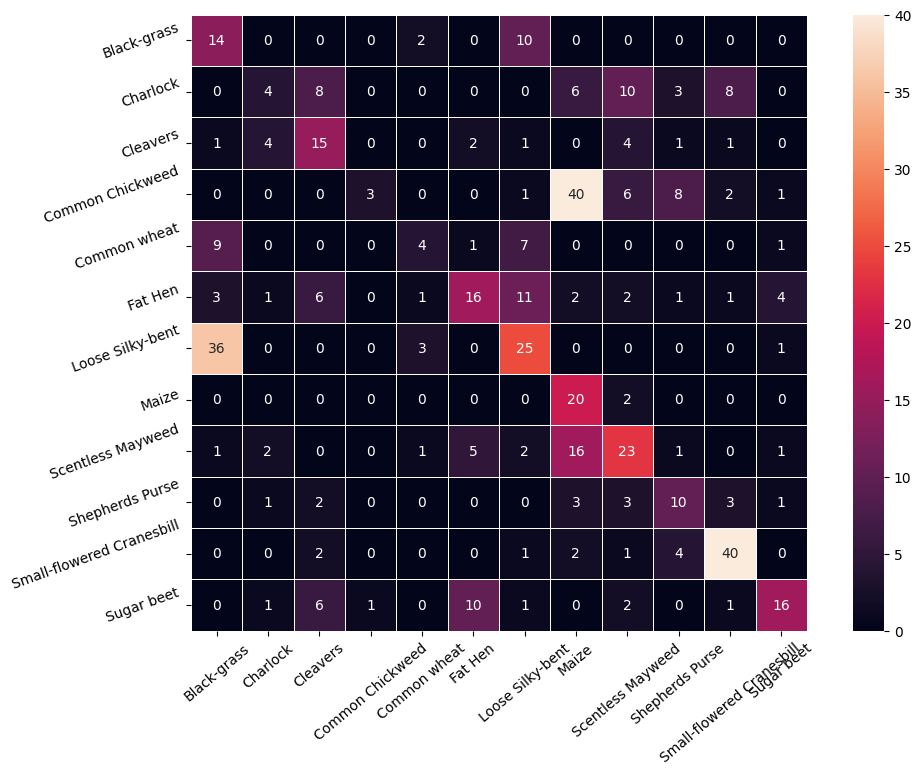

In [43]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Class names (aka categories)
categories=list(enc.classes_)

# Set tick labels for the axes
ax.xaxis.set_ticklabels(categories,rotation=40)
ax.yaxis.set_ticklabels(categories,rotation=20)

plt.show()

###Classification report

In [47]:
fy_test_pred = model.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_pred,axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)
from sklearn.metrics import classification_report

report = classification_report(y_test_true_classes, y_test_pred_classes, target_names=enc.classes_)
print(report)


15/15 [==============================] - 2s 134ms/step
                           precision    recall  f1-score   support

              Black-grass       0.22      0.54      0.31        26
                 Charlock       0.31      0.10      0.15        39
                 Cleavers       0.38      0.52      0.44        29
         Common Chickweed       0.75      0.05      0.09        61
             Common wheat       0.36      0.18      0.24        22
                  Fat Hen       0.47      0.33      0.39        48
         Loose Silky-bent       0.42      0.38      0.40        65
                    Maize       0.22      0.91      0.36        22
        Scentless Mayweed       0.43      0.44      0.44        52
          Shepherds Purse       0.36      0.43      0.39        23
Small-flowered Cranesbill       0.71      0.80      0.75        50
               Sugar beet       0.64      0.42      0.51        38

                 accuracy                           0.40       475
     

###Checking to ensure all classes are present
All classes are present

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model1 = load_model(model)  # Replace "model1.h5" with the filename of your Model 1

# Assuming X_test contains the test images and y_test contains the corresponding labels
# Replace X_test and y_test with your test data
# Make sure the images are preprocessed in the same way as during training

# Predictions for Model 1
predictions1 = model1.predict(X_test)
predicted_classes1 = np.argmax(predictions1, axis=1)
correct_indices1 = np.where(predicted_classes1 == y_test)[0]
incorrect_indices1 = np.where(predicted_classes1 != y_test)[0]

# Get the indices of the most predicted classes
class_counts1 = np.bincount(predicted_classes1)
most_predicted_classes_indices1 = np.argsort(class_counts1)[-3:][::-1]

# Get the indices of the most confused classes
confused_classes1 = y_test[incorrect_indices1]
confused_class_counts1 = np.bincount(confused_classes1)
most_confused_classes_indices1 = np.argsort(confused_class_counts1)[-3:][::-1]

# Plot the images for the most predicted and most confused classes in Model 1
plt.figure(figsize=(15, 6))

# Plot the images for the most predicted classes
for i, idx in enumerate(most_predicted_classes_indices1):
    plt.subplot(2, 3, i + 1)
    indices = np.where(predicted_classes1 == idx)[0][:3]  # Select 3 images for each class
    for j, image_idx in enumerate(indices):
        plt.imshow(X_test[image_idx])
        plt.title(f"Class {idx}")
        plt.axis('off')

# Plot the images for the most confused classes
for i, idx in enumerate(most_confused_classes_indices1):
    plt.subplot(2, 3, i + 4)
    indices = np.where(confused_classes1 == idx)[0][:3]  # Select 3 images for each class
    for j, image_idx in enumerate(indices):
        plt.imshow(X_test[incorrect_indices1[image_idx]])
        plt.title(f"Predicted {predicted_classes1[incorrect_indices1[image_idx]]}, Actual {idx}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Check if all 12 classes are present
assert len(np.unique(all_labels)) == 12, "Not all 12 classes are present in the data"

In [ ]:
# Print the unique values in all_labels
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Counts:", counts)

# Check if any counts are zero
if any(counts == 0):
    print("Error: Some classes have no data points.")

Unique labels: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Counts: [263 390 287 611 221 475 654 221 516 231 496 385]


## Model Performance Improvement
We are going to use data augmentation for our next model

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

###Model2- Data augmentation with class weight
###Observation:
The overall accuracy of the model is moderate at 68%.
High-performing species include Charlock, Cleavers, Common Chickweed, Common Wheat, Small-flowered Cranesbill, and Sugar Beet, showing reliable classification.
Black-grass and Loose Silky-bent have high recall but low precision, indicating many false positives.
Shepherd’s Purse shows the poorest performance with very low precision and recall, indicating significant classification challenges.
Improvements could focus on enhancing the classification of species with low precision and recall, such as Black-grass, Fat Hen, Loose Silky-bent, Scentless Mayweed, and Shepherd’s Purse.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# !pip install imbalanced-learn
import imblearn
from sklearn.utils import class_weight

from imblearn.metrics import classification_report_imbalanced

# Convert pandas Series/DataFrames to numpy arrays if needed
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_val = y_val.values.ravel() if hasattr(y_val, 'values') else y_val.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()


# Verify unique labels in each dataset
print(f"Unique labels in y_train: {np.unique(y_train)}")
print(f"Unique labels in y_val: {np.unique(y_val)}")
print(f"Unique labels in y_test: {np.unique(y_test)}")


# Concatenate all labels to ensure all possible labels are included
all_labels = np.concatenate([y_train, y_val, y_test])

# Check if all 12 classes are present
assert len(np.unique(all_labels)) == 12, "Not all 12 classes are present in the data"

# Fit LabelBinarizer on all labels
enc = LabelBinarizer()
enc.fit(all_labels)

# Transform individual sets
y_train_encoded = enc.transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

# Calculate class weights using the classes from LabelBinarizer and y_train
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Determine the number of classes
num_classes = len(enc.classes_)

# Define data augmentation generator for training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data generator for validation and test sets (no augmentation)
test_datagen = ImageDataGenerator()

# Prepare data augmentation on the training set
train_datagen.fit(X_train_normalized)

# Define the improved CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(256, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model with Adam optimizer
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model with data augmentation
history = model.fit(train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=15,
                    class_weight=class_weights_dict,
                    callbacks=[reduce_lr])



Unique labels in y_train: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Unique labels in y_val: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Unique labels in y_test: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Epoch 1/15
121/121 [==============================] - 153s 1s/step - loss: 4.8048 - accuracy: 0.2493 - val_loss: 9.8802 - val_accuracy: 0.0491 - lr: 0.0010
Epoch 2/15
121/121 [==============================] - 147s 1s/step - loss: 1.9696 - accuracy: 0.3130 - val_loss: 7.8712 - val_accuracy: 0.0584 - lr: 0.0010
Epoch 3/15
121/121 [=======================

In [48]:
# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

###Plot the training and validation accuracity

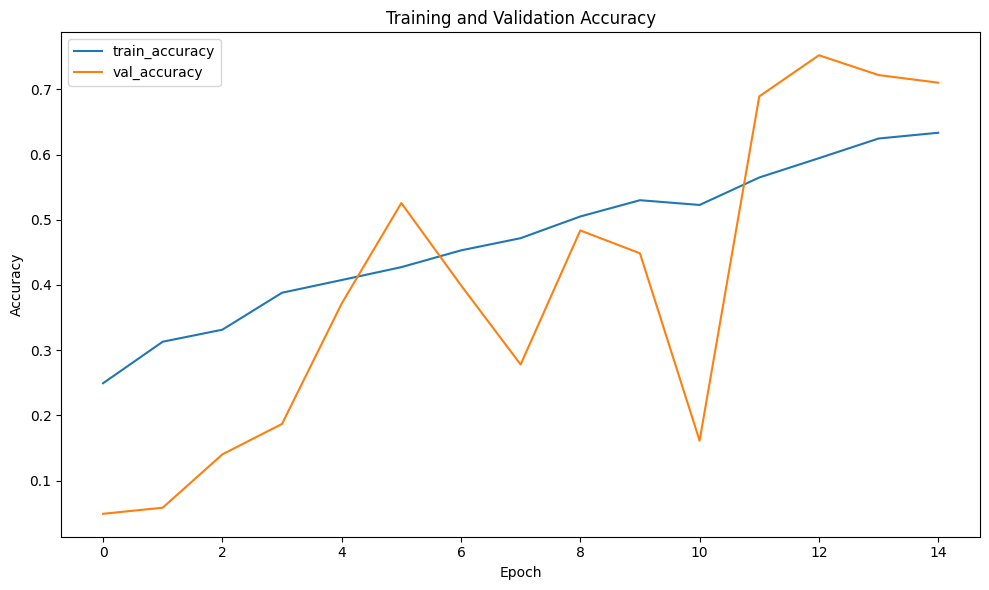

In [15]:

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

###Evaluate the model in the test data

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')

15/15 [==============================] - 4s 243ms/step - loss: 1.3574 - accuracy: 0.5832
Test accuracy: 0.5831578969955444


###Prediction on the test set

In [16]:
# Predictions on the test set
y_pred = model.predict(X_test_normalized)

15/15 [==============================] - 5s 324ms/step


In [17]:
y_pred

array([[2.62049360e-09, 4.26007146e-10, 2.55443399e-13, ...,
        6.43826788e-04, 6.71355228e-05, 7.03374269e-07],
       [1.61074595e-07, 1.51124795e-03, 2.80029411e-07, ...,
        4.02258575e-01, 4.66955990e-01, 5.63357375e-04],
       [9.60325906e-06, 4.64602932e-02, 7.33213092e-04, ...,
        1.89332023e-01, 6.74018800e-01, 4.43204911e-03],
       ...,
       [8.55159879e-01, 5.53933954e-10, 1.04334781e-07, ...,
        8.09790467e-14, 2.50228838e-09, 6.35936085e-05],
       [4.27200939e-06, 1.44036225e-04, 1.15519285e-07, ...,
        4.62730289e-01, 1.23878988e-02, 1.25225191e-03],
       [2.92862910e-06, 2.89165433e-02, 4.59892122e-04, ...,
        4.00615871e-01, 4.25734729e-01, 5.15612308e-03]], dtype=float32)

###Plotting Confussion Matrix

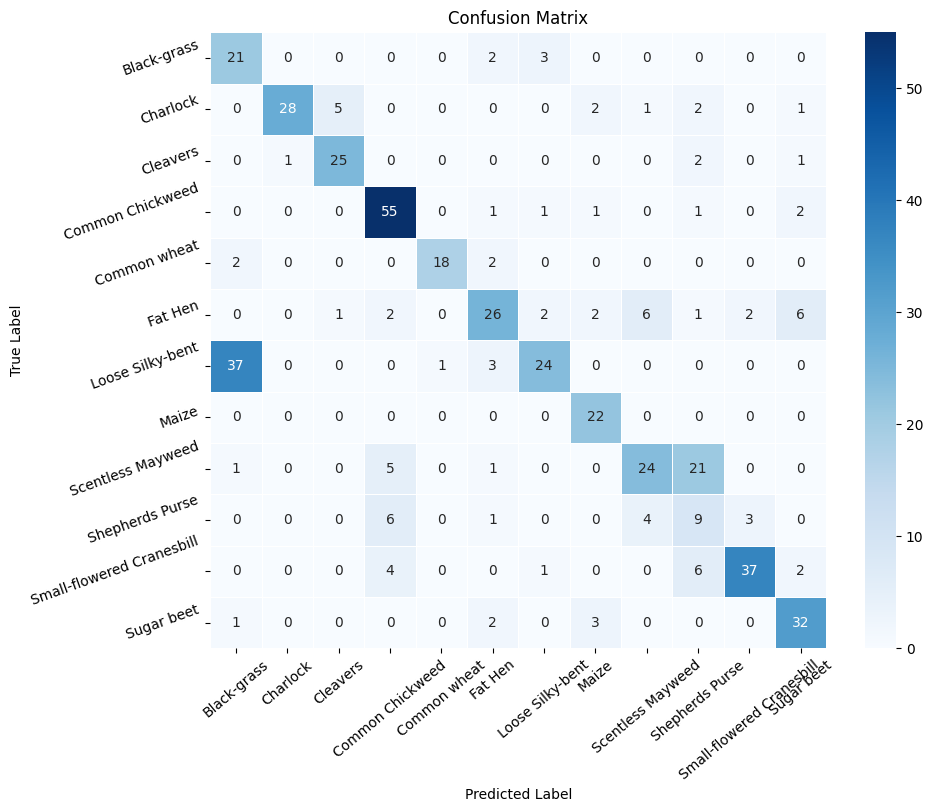

In [18]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg, num_classes=num_classes)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    cmap='Blues'
)

# Class names (aka categories)
categories = list(enc.classes_)

# Set tick labels for the axes with the correct number of labels
ax.set_xticks(np.arange(len(categories)) + 0.5)
ax.set_yticks(np.arange(len(categories)) + 0.5)
ax.set_xticklabels(categories, rotation=40)
ax.set_yticklabels(categories, rotation=20)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


###Model Summary


In [19]:
# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                        

###Classification Report

In [20]:
fy_test_pred = model.predict(X_test_normalized)
y_test_pred_classes = np.argmax(y_pred,axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)
from sklearn.metrics import classification_report

report = classification_report(y_test_true_classes, y_test_pred_classes, target_names=enc.classes_)
print(report)


15/15 [==============================] - 3s 216ms/step
                           precision    recall  f1-score   support

              Black-grass       0.34      0.81      0.48        26
                 Charlock       0.97      0.72      0.82        39
                 Cleavers       0.81      0.86      0.83        29
         Common Chickweed       0.76      0.90      0.83        61
             Common wheat       0.95      0.82      0.88        22
                  Fat Hen       0.68      0.54      0.60        48
         Loose Silky-bent       0.77      0.37      0.50        65
                    Maize       0.73      1.00      0.85        22
        Scentless Mayweed       0.69      0.46      0.55        52
          Shepherds Purse       0.21      0.39      0.28        23
Small-flowered Cranesbill       0.88      0.74      0.80        50
               Sugar beet       0.73      0.84      0.78        38

                 accuracy                           0.68       475
     

## Final Model

###Comparing models
Model 1:
* Training Duration: Shorter epochs (approximately 35 each)
* Initial Performance:
Epoch 1: loss = 2.4565, accuracy = 0.0998, val_loss = 2.3842, val_accuracy = 0.1799.
* Final Performance:
Epoch 15: loss = 1.8112, accuracy = 0.2836, val_loss = 1.6420, val_accuracy = 0.3621.

Model 2:
* Training Duration: Longer epochs (Approximately 147s each).
* Initial Performance:
* Epoch 1: loss = 4.8048, accuracy = 0.2493, val_loss = 9.8802, val_accuracy = 0.0491.
* Final Performance:
Epoch 15: loss = 1.0145, accuracy = 0.6335, val_loss = 0.8841, val_accuracy = 0.7103.


### Selected Model: Model 2
Reason for Selection:

Better Accuracy: Model 2 significantly outperformed Model 1, achieving a final training accuracy of 63.35% and validation accuracy of 71.03%, compared to Model 1's 28.36% and 36.21% respectively.
Lower Loss: Model 2 also demonstrated lower final training and validation loss values, indicating better generalization and convergence.



Comment on the final model you have selected and use the same in the below code to visualize the image.

###Comments on Final model
Model 2 shows superior performance in terms of both accuracy and loss. The longer training time per epoch suggests a more complex architecture or additional processing which contributed to better learning. The model's training process involved an initial learning rate of 0.001, which was reduced to 0.0002 in later epochs, aiding in fine-tuning and improving accuracy towards the end of training. This adaptive learning rate strategy helped the model achieve better performance without overfitting, as indicated by the high validation accuracy.

### Visualizing the prediction

1/1 [==============================] - 0s 98ms/step


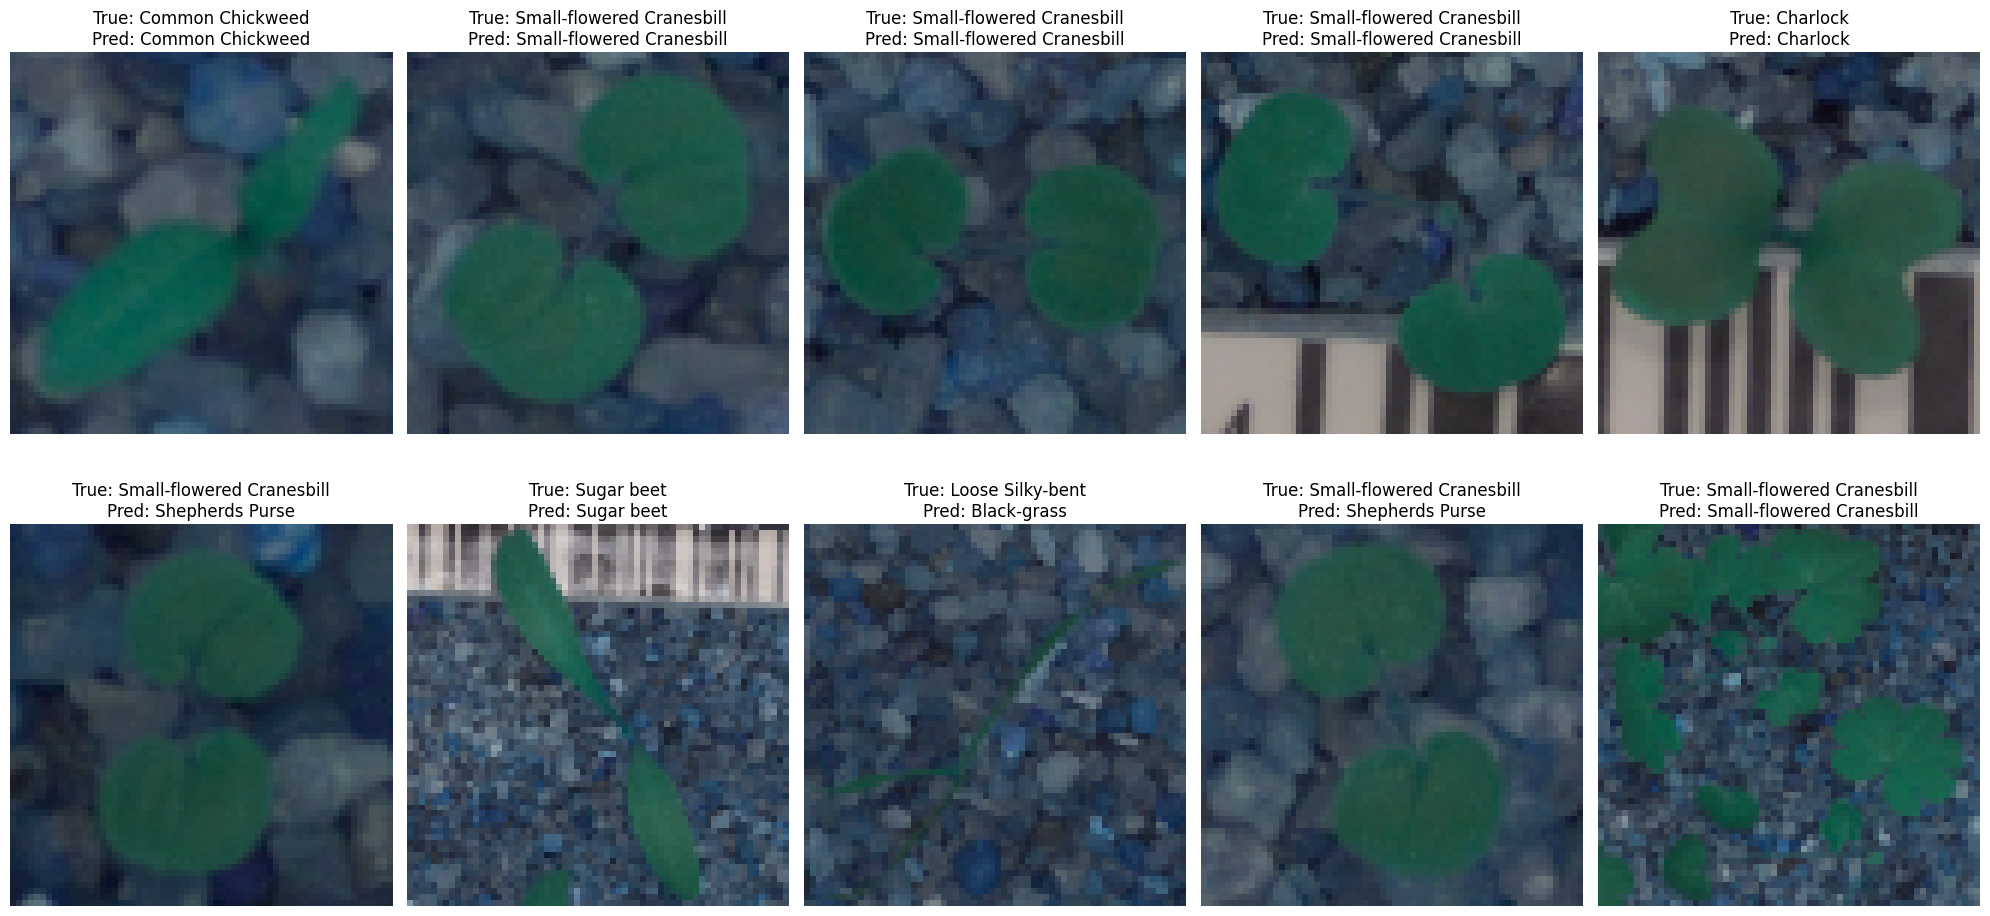

In [21]:
import matplotlib.pyplot as plt

# Function to plot images along with their predicted and true labels
def plot_predictions(model, X, y_true, encoder, num_images=10):
    y_pred = model.predict(X[:num_images])
    y_pred_labels = encoder.inverse_transform(y_pred)
    y_true_labels = encoder.inverse_transform(y_true[:num_images])

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i])
        plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(model, X_test_normalized, y_test_encoded, enc)


## Actionable Insights and Business Recommendations

###Actionable Insights:
Species with High Performance:

Charlock, Cleavers, Common Chickweed, Common Wheat, Small-flowered Cranesbill, and Sugar Beet:
These species exhibit high precision, recall, and F1-scores, indicating that the model can reliably identify these plants.
Action: Leverage these strong models in applications such as automated plant identification in agriculture or environmental monitoring.
Species with Low Performance:

Black-grass, Fat Hen, Loose Silky-bent, Scentless Mayweed, Shepherd’s Purse:
These species have lower precision, recall, and F1-scores, particularly Shepherd’s Purse, indicating significant misclassifications.
Action: Focus on improving the training data and algorithms for these species to enhance model performance.
Specific Issues:

Black-grass: High recall but low precision indicates many false positives.
Loose Silky-bent: Similar issue with high recall but very low precision.
Action: Refine the model to reduce false positives, possibly by incorporating more distinguishing features or additional data.

##Business Recommendations:
###Enhance Training Data:

Data Augmentation: Increase the quantity and diversity of training data for poorly performing species. Use techniques such as data augmentation, synthetic data generation, and collecting more real-world samples.
Quality Control: Ensure that the training data is accurately labeled and representative of real-world conditions.
Model Improvement:

Algorithm Tuning: Experiment with different machine learning algorithms or neural network architectures that might better capture the nuances of the poorly performing species.
Feature Engineering: Identify and incorporate additional features (e.g., leaf shape, flower structure) that could improve the distinction between similar species.

##Application Development:
Automated Identification Tools: Develop and deploy applications that utilize the strong performance of the model for species with high accuracy. These tools can assist farmers in identifying and managing crops and weeds.
Integrated Pest Management (IPM): Use the model to support IPM programs by accurately identifying weed species and advising on targeted herbicide application, reducing costs and environmental impact.
Targeted Research:

Field Studies: Conduct field studies to understand why certain species are misclassified. This can involve studying environmental factors, plant growth stages, and variations within species.
Collaboration with Botanists: Work with botanists and agronomists to refine the classification criteria and improve the model’s interpretability.
User Training and Feedback:

Training for End Users: Educate farmers and agricultural workers on using the identification tools effectively and interpreting the results correctly.
Feedback Loop: Implement a feedback mechanism where users can report misclassifications. Use this feedback to continuously improve the model.
Technology Integration:

IoT and Sensors: Integrate the plant identification model with IoT devices and sensors for real-time monitoring and data collection in fields.
Mobile Applications: Develop mobile apps that leverage the model for on-the-go plant identification, helping farmers and gardeners make informed decisions.

###Summary:
To maximize the value of the classification model, focus on improving the performance for underperforming species through enhanced training data and algorithm tuning. Leverage the strengths of the model to develop practical applications that support agricultural productivity and sustainability. Continuous user feedback and targeted research will further refine the model, ensuring it remains a valuable tool in plant identification and management.








_____